# Problem 7

Necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create an array of spacings

In [5]:
# Arranging an array from 1mm to 10mm (.001m to .01m)
spacing = np.linspace(1, 10, 15) # This is in mm

print(spacing)

[ 1.          1.64285714  2.28571429  2.92857143  3.57142857  4.21428571
  4.85714286  5.5         6.14285714  6.78571429  7.42857143  8.07142857
  8.71428571  9.35714286 10.        ]


In [6]:
len = 10 # This is in mm

# diam is 2 mils (0.0508 mm), so rad is 0.0254 mm
rad = 0.0254

width = 20 # This is in mm

In [13]:
def selfInduct(r: float, l: float) -> float:
    # Constant for mu
    mu = (4 * np.pi) * (10 ** -7)
    
    # The actual formula
    lSelf = 0.0
    
    if (l > r):
        # Convert from mm to cm
        r * 1e-1
        l * 1e-1
        
        lSelf = (.002 * l) * (np.log((2 * l) / r) - (3 / 4)) # returns uH/cm
        lSelf *= 100 # puts in back in nH/mm
    else:
        print("warning")
    
    return lSelf

def mutualInduct(s: float, l: float) -> float:
    # Constant for mu
    mu = (4 * np.pi) * (10 ** -7)
    
    mSelf = 0.0
 
    # Convert from mm to cm
    s * 1e-1
    l * 1e-1
        
    mSelf = (.002 * l) * (np.log((2 * l) / s) - 1) # returns uH/cm
    mSelf *= 100 # puts in back in nH/mm

        
    return mSelf
        
def totalInduct(s: float, l: float, r: float):
    # Assume we are getting mm
    totalWMut = 0.0
    
    totalWMut = (2 * (selfInduct(r, l))) - (2 * mutualInduct(s, l))
    
    return totalWMut

def parPlaneInduct(s: float, l: float):
    # Convert mm to m
    s *= 1e-3
    l *= 1e-3
    
    mu = (4 * np.pi) * (10 ** -7)
    
    leff = (mu * s * l) / l # this is in nH
    
    return leff

def groundPlaneInduct(l: float, s: float, d: float):
    # Convert mm to m
    s *= 1e-3
    l *= 1e-3
    d *= 1e-3
    
    mu = (4 * np.pi) * (10 ** -7)
    
    leff = ((mu * l) / (2 * np.pi)) * np.arccosh((2 * s) / d)
    
    return leff # this is in nH

In [14]:
totalInducts = []
parPlaninducts = []
groundPlaneInducts = []

for s in spacing:
    totalInducts.append(totalInduct(s, len, rad))
    parPlaninducts.append(parPlaneInduct(s, len))
    groundPlaneInducts.append(groundPlaneInduct(len, s, rad*2))
    
print(parPlaninducts)
    

[1.2566370614359174e-09, 2.0644751723590067e-09, 2.8723132832820964e-09, 3.6801513942051866e-09, 4.487989505128277e-09, 5.2958276160513665e-09, 6.1036657269744555e-09, 6.911503837897544e-09, 7.719341948820636e-09, 8.527180059743726e-09, 9.335018170666815e-09, 1.0142856281589907e-08, 1.0950694392512996e-08, 1.1758532503436083e-08, 1.2566370614359171e-08]


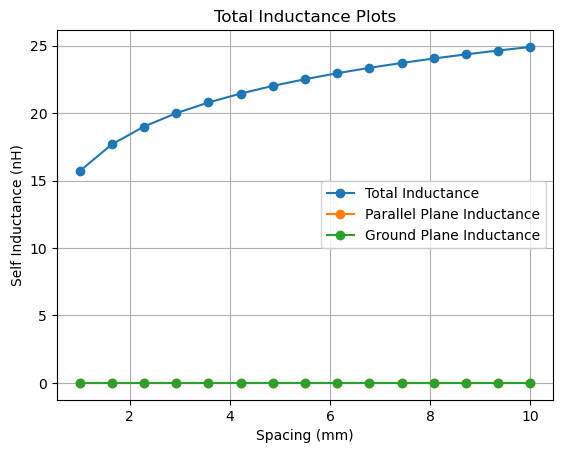

In [15]:
fig, ax = plt.subplots()

ax.plot(spacing, totalInducts, marker='o', linestyle='-', label='Total Inductance')
ax.plot(spacing, parPlaninducts, marker='o', linestyle='-', label='Parallel Plane Inductance')
ax.plot(spacing, groundPlaneInducts, marker='o', linestyle='-', label='Ground Plane Inductance')

ax.set(xlabel='Spacing (mm)', ylabel='Self Inductance (nH)',
       title="Total Inductance Plots")
ax.grid()
ax.legend()

Ground plane has the lowest inductance due to its large surface area